# My notebook for playing with tensorflow

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import integrate
from IPython import display
%matplotlib inline

In [2]:
#make up some random data in a numpy array
data = np.random.randint(1,10, size=10)

#x is a constant with the values of data
x = tf.constant(data)
#y is a variable with the value x^2
y = tf.Variable(x**2)

#initialize all vairables is when it first runs the lines of the variable above
model = tf.global_variables_initializer()

#run session, session is needed as this is when it actually completes the commands
with tf.Session() as sess:
    #run the global variable initializer
    sess.run(model)
    #print y from in the session
    print(sess.run(y))

[ 1 36 36  1 36  9  9 81  1 36]


In [19]:
#set up x and y as variables witt value 0
x = tf.Variable(0)
y = tf.Variable(0)

#set model to initialize variables
model = tf.global_variables_initializer()

#run session
with tf.Session() as sess:
    
    #run the global variables  initializer
    sess.run(model)
    
    #loop 5 times within session
    for i in range(5):
    
        #update values of x and y
        x += 1
        y = x**2
        
        #print y
        print(sess.run(y))

1
4
9
16
25


In [17]:
#set up tensorflow variables to 0
num = tf.Variable(0)
ave = tf.Variable(0)
tot = tf.Variable(0)

#set model to initialize variables
model = tf.global_variables_initializer()

#run session
with tf.Session() as sess:
    
    #initialize variables
    sess.run(model)
    
    #loop 5 times
    for i in range(5):
        
        #calculate and  set variables values
        num += 1
        ran = np.random.randint(1000)
        tot = tot+ran
        average = tot/num
        
        #print average
        print(sess.run(average))

465
621
691
578
644


In [22]:
x = tf.constant(35)
print(x)
y = tf.Variable(x + 5)

model =  tf.global_variables_initializer()

with tf.Session() as sess:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("/home/logdir", sess.graph)

    sess.run(model)
    print(sess.run(y))

Tensor("Const_2:0", shape=(), dtype=int32)
40


In [3]:
x = tf.placeholder("float", 3)
y = x ** 2

with tf.Session() as sess:
    result = sess.run(y, feed_dict={x: [1, 2, 3]})
    print(result)

[ 1.  4.  9.]


In [16]:
import tensorflow as tf         
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

num_examples = 100    #100 points
X = np.array([np.linspace(0, 6, num_examples), np.linspace(4, 16, num_examples)]) #array with 0-6 and 0-12
X += np.random.randn(2, num_examples) #add random numbers, 2 dimensions to X
x, y = X                              #split X into x and y
x_with_bias = np.array([(1., a) for a in x]).astype(np.float32) #array of [1., a] 2 by 100, the 1 is multiplied by the c weight

losses = []
training_steps = 5000
learning_rate = 0.001 #rate fo learning

with tf.Session() as sess:
    input = tf.constant(x_with_bias)
    target = tf.constant(np.transpose([y]).astype(np.float32)) #y but instead of 50 by 1, its 1 by 50
    weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1)) #random weights value, 2 by 1, mean 0, standard deviation 0.1

    tf.global_variables_initializer().run()

    yhat = tf.matmul(input, weights) #multiply x_with_bias by the weights
    yerror = tf.sub(yhat, target) #error is the target - yhat
    loss = tf.nn.l2_loss(yerror) #the error is squared and halved to punish bigger mistakes more
  
    update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
  
    for _ in range(training_steps): #100 steps
        update_weights.run() #run update wieghts
        losses.append(loss.eval()) #append to losses with the loss (the l2 error)

    betas = weights.eval() #betas is the weights
    yhat = yhat.eval()

plt.scatter(x, y) #plot points
plt.scatter(x, np.transpose(yhat)[0], c="g") #plot points with weights applied
line_x_range = (-2, 8)
plt.plot(line_x_range, [betas[0] + a * betas[1] for a in line_x_range], "g", alpha=0.6) #draw line with weights from -2 to 8
plt.grid(True)
plt.show()

AttributeError: 'module' object has no attribute 'global_variables_initializer'

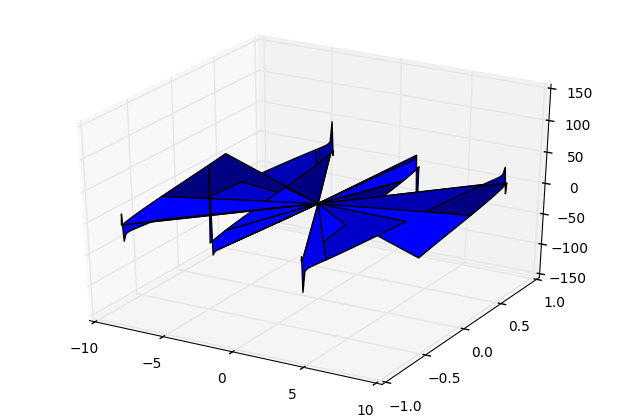

In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
ax = Axes3D(fig)
x = np.array([np.linspace(-10, 10, 210), np.zeros(210)])
y = np.sin(x)
z = np.tan(x)
ax.plot_surface(x, y, z)